### Import all required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from scipy import stats
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.tsa.api as smt
from sklearn.metrics import confusion_matrix, r2_score, mean_squared_error
import math

import warnings
warnings.filterwarnings('ignore')

### Reading csv file

In [2]:
df = pd.read_csv('train.csv')

### Data Cleaning

#### Data checks

In [3]:
# Displaying first 5 records of the dataset
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#Let's see the shape of data
df.shape

(1460, 81)

In [5]:
#Let's check the information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# Summary of all numerical columns in the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


#### Check for duplicates

In [7]:
# Drop duplicates
df.drop_duplicates(inplace=True)

#### Handle missing values

In [8]:
#check missing values percentage
missing_Per = (df.isnull().sum() / df.isnull().count()*100).sort_values(ascending = False)
missing_Per[missing_Per.values > 0]

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageCond       5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

In [9]:
#Drop the columns that have high missing values
df.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','LotFrontage'],axis=1,inplace=True)

In [10]:
#Print remaining missing value columns
null_columns = df.columns[df.isnull().any()]
print('Null value columns: {}'.format(null_columns))

Null value columns: Index(['MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond'],
      dtype='object')


##### Impute missing values

In [11]:
#Function to handle missing values
def fill_Missing_Values(df):    
    # check missing values
    miss_col = df.isnull().sum()
    # filter for null value columns
    miss_col = miss_col[miss_col > 0]
    #Loop missing columns
    for column in miss_col.index:
        if df[column].dtype.name == 'object':
            # impute object type columns with mode
            df[column].fillna(df[column].mode()[0], inplace=True)
            
        elif df[column].dtype.name == 'float64' or df[column].dtype.name == 'int64' or df[column].dtype.name == 'int32':
            # impute numeric type columns with median
            df[column] = df[column].fillna((df[column].median()))
            
        else:
            print('Unable to handle: ', column)
            
    return df

In [12]:
#Fill missing values
df = fill_Missing_Values(df)

In [13]:
#Check if any missing values exists
missing_Per = (df.isnull().sum() / df.isnull().count()*100).sort_values(ascending = False)
missing_Per[missing_Per.values > 0]

Series([], dtype: float64)

#### Check for unique value columns

In [14]:
#Check if any unique value columns in dataset
for a in df.columns:
    if len(df[a].unique()) == df.shape[0]:
        print(a)

Id


In [15]:
# Drop unique value columns
df.drop(['Id'], axis = 1, inplace = True)

##### Derive new features

In [16]:
# Creating a new Column to determine the age of the property
df['Age'] = df['YearBuilt'].max() - df['YearBuilt']
df['Remodel_Age'] = df['YearRemodAdd'].max() - df['YearRemodAdd']
df['Sold_Age'] = df['YrSold'].max() - df['YrSold']
df['Garage_Age'] = df['GarageYrBlt'].max() - df['GarageYrBlt']

# Dropping columns
#df.drop(['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt'], axis=1, inplace = True)

In [17]:
#Check shape of datset again
df.shape

(1460, 78)

#### Check and remove Outliers

In [18]:
# Saperate Categorical & Numerical columns for analysis
categorical_cols=[]
numerical_cols=[]
for column in df.columns:
    if df[column].dtype.name == 'object':
        categorical_cols.append(column)
    elif df[column].dtype.name == 'float32' or df[column].dtype.name == 'float64' or df[column].dtype.name == 'int64' or df[column].dtype.name == 'int32':
        numerical_cols.append(column)

In [19]:
# Remove outliers > +3 Standard Deviation or < -3 Standard Deviation 
z = np.abs(stats.zscore(df[numerical_cols]))
selected = df[numerical_cols][(z < 3).all(axis=1)]
df = df.loc[selected.index]
print(df.shape)

(1024, 78)


#### Check and drop single value columns

In [20]:
for a in df.columns:
    cnt = len(df[a].unique())
    if cnt < 2:
        print(a)
        # Dropping single value columns
        df.drop(a,axis=1,inplace=True)

Utilities
BsmtHalfBath
KitchenAbvGr
PoolArea


In [21]:
df.shape

(1024, 74)

### Data visualization

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

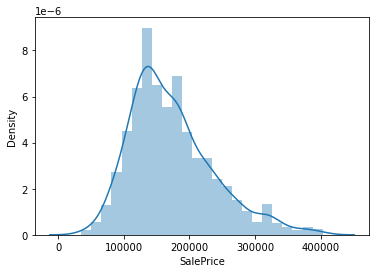

In [22]:
# Plot Saleprice
sns.distplot(df.SalePrice)

#### Observations

From above plot we can observe that the `SalePrice` is right skewed

In [23]:
print("Skewness: %f" % df['SalePrice'].skew())

Skewness: 0.880217


In [24]:
# Saperate Categorical & Numerical columns for analysis
categorical_cols=[]
numerical_cols=[]
for column in df.columns:
    if df[column].dtype.name == 'object':
        categorical_cols.append(column)
    elif df[column].dtype.name == 'float64' or df[column].dtype.name == 'int64' or df[column].dtype.name == 'int32':
        numerical_cols.append(column)

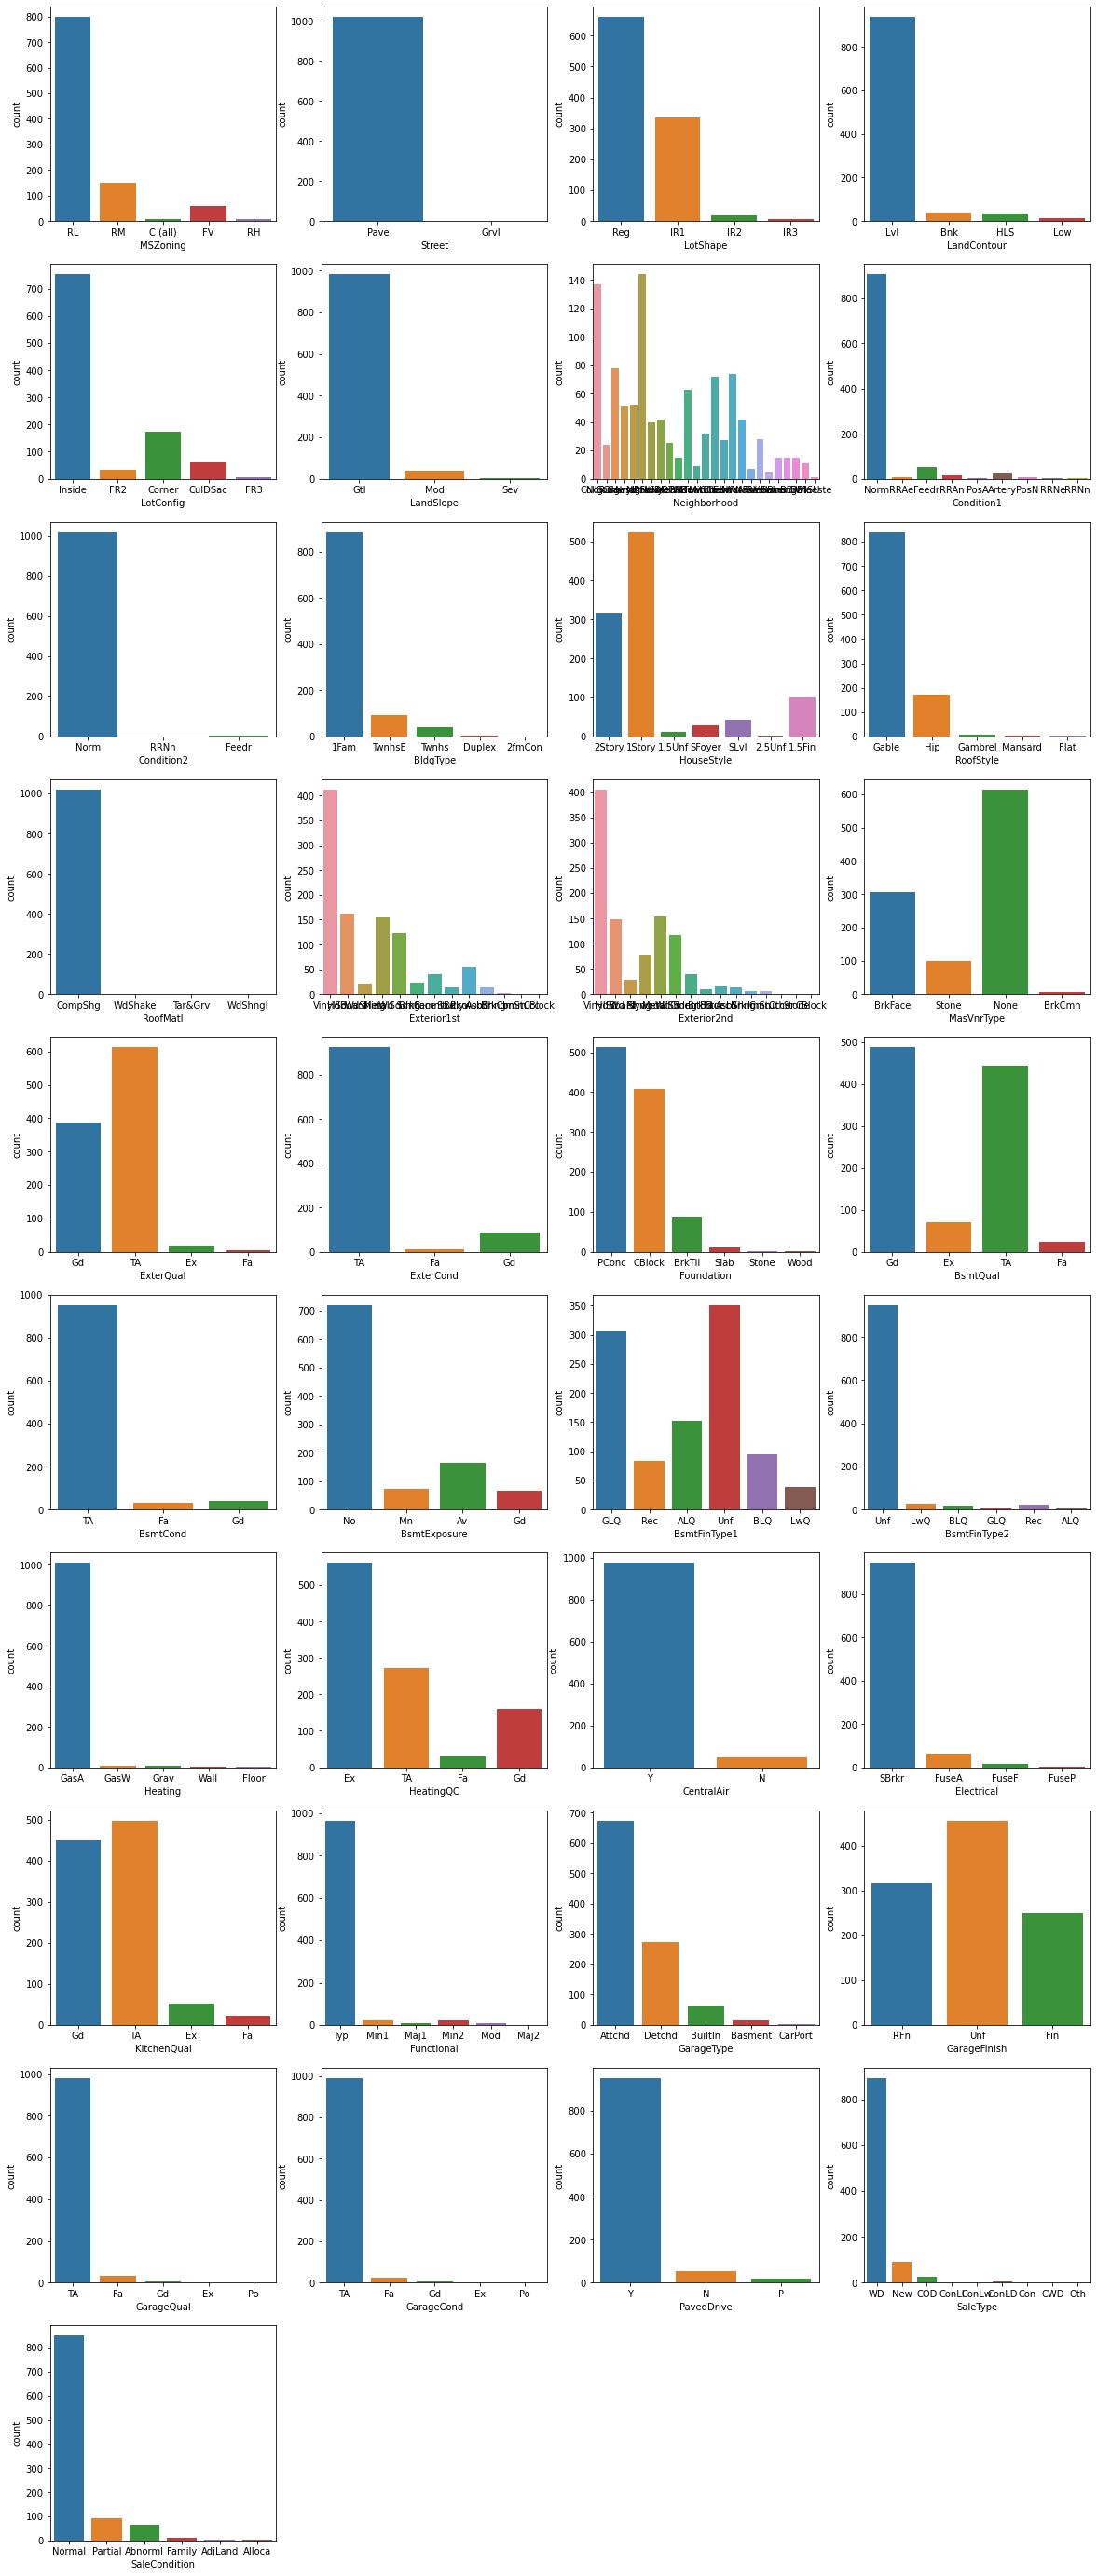

In [25]:
plt.figure(figsize=(20, 50))
rows = int(math.ceil(len(categorical_cols)/4))
cols = 4
for i,n in enumerate(categorical_cols):
    plt.subplot(rows, cols, i+1)
    sns.countplot(x=n, data= df)
plt.show()

###### Observation
    Based on the above plots the variables Street, Condition2, RoofMatl, and Heating are having higher count for one category. This won't add any value to the model. So, dropping those variables in next step

#### Dropping redundant columns

In [26]:
df.Street.value_counts(), df.Condition2.value_counts(), df.RoofMatl.value_counts(), df.Heating.value_counts()

(Pave    1022
 Grvl       2
 Name: Street, dtype: int64,
 Norm     1020
 Feedr       3
 RRNn        1
 Name: Condition2, dtype: int64,
 CompShg    1019
 Tar&Grv       3
 WdShake       1
 WdShngl       1
 Name: RoofMatl, dtype: int64,
 GasA     1010
 GasW        6
 Grav        6
 Wall        1
 Floor       1
 Name: Heating, dtype: int64)

In [27]:
# Dropping redundant columns again
df.drop(['Street','Condition2', 'RoofMatl', 'Heating'],axis=1,inplace=True)

In [28]:
# Again separate Categorical & Numerical columns
categorical_cols=[]
numerical_cols=[]
for column in df.columns:
    if df[column].dtype.name == 'object':
        categorical_cols.append(column)
    elif df[column].dtype.name == 'float64' or df[column].dtype.name == 'int64' or df[column].dtype.name == 'int32':
        numerical_cols.append(column)
numerical_cols.remove('SalePrice')

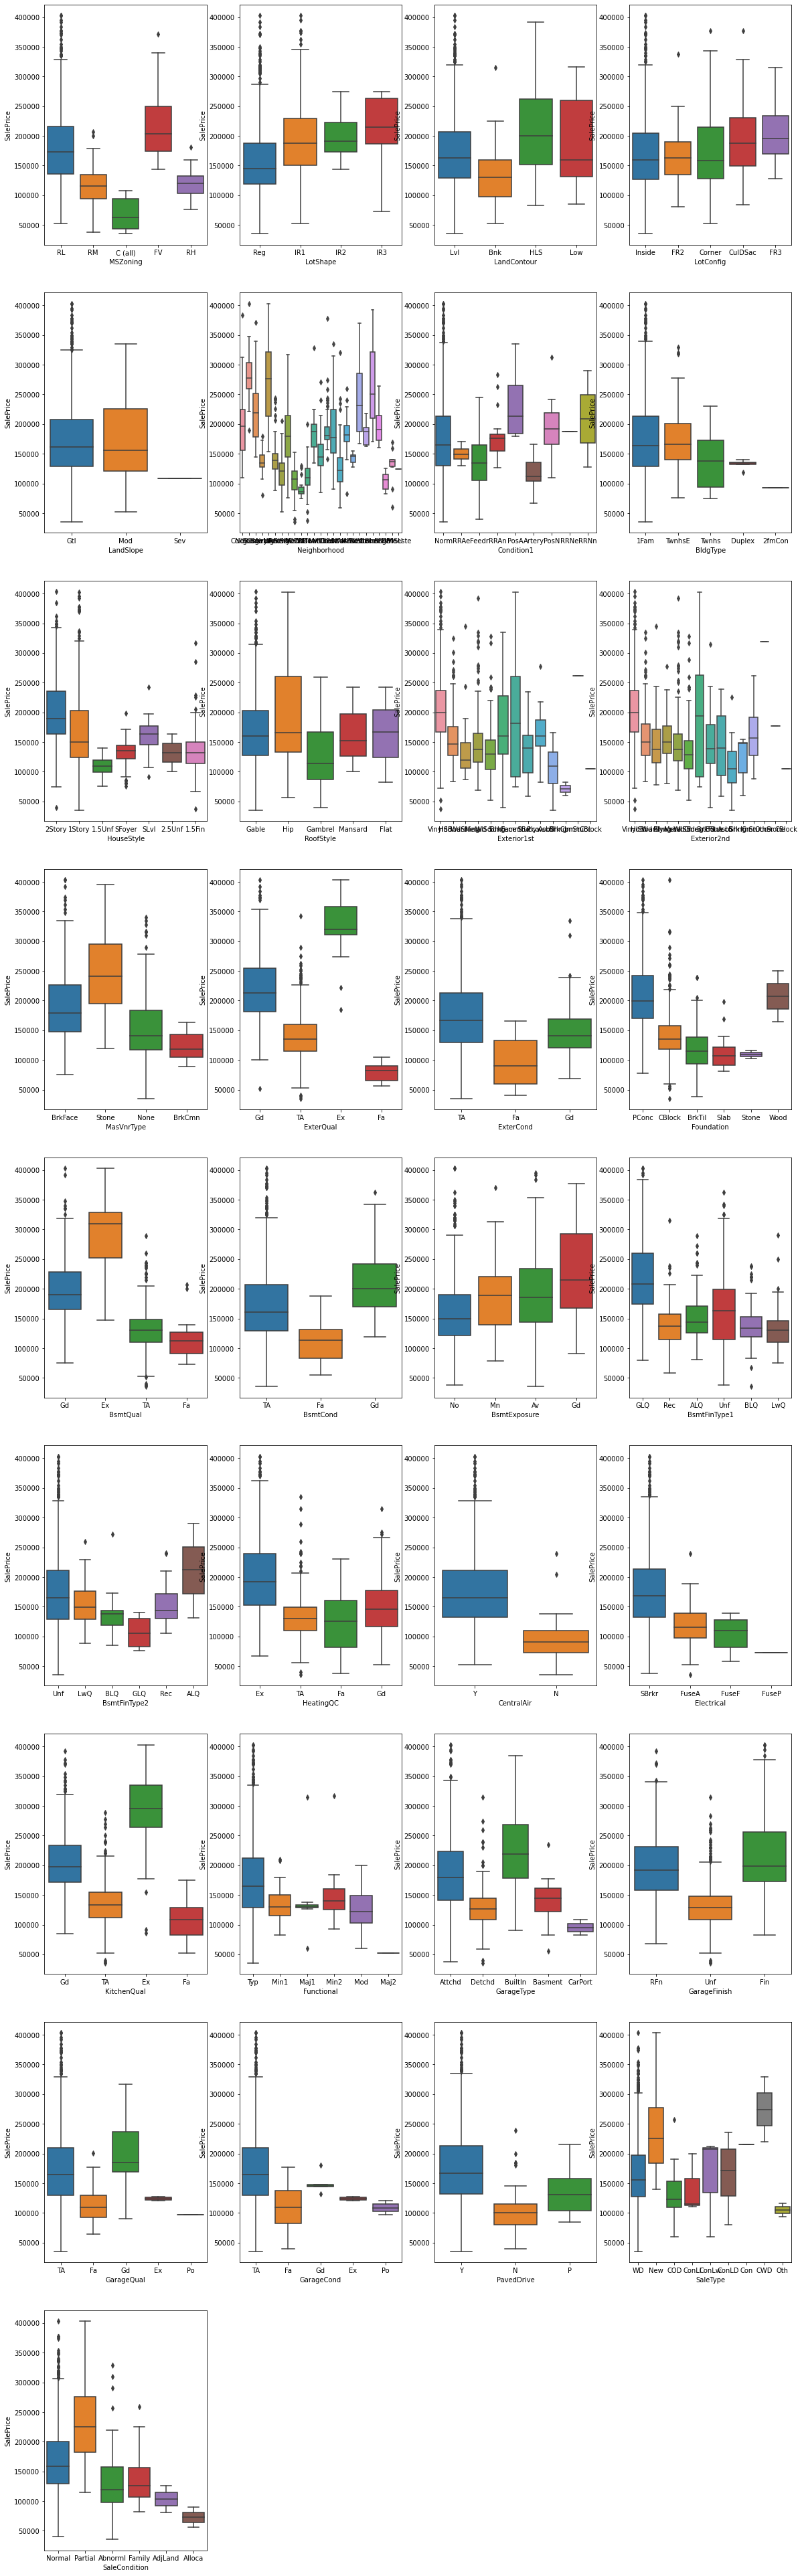

In [29]:
plt.figure(figsize=(20, 70))
rows = int(math.ceil(len(categorical_cols)/4))
cols = 4
for i,n in enumerate(categorical_cols):
    plt.subplot(rows, cols, i+1)
    sns.boxplot(x = n, y = 'SalePrice', data = df)
plt.show()

###### Observation
    Price of Excellet basement quality is highest among all
    Price of Excellent Kitchen quality is also higher.
    Price of Builtin Garagetype and Finished garage is the highest
    Price of Excellent ExterQual and HeatingQc is highest
    Price of Poured Contrete Foundation is highest.

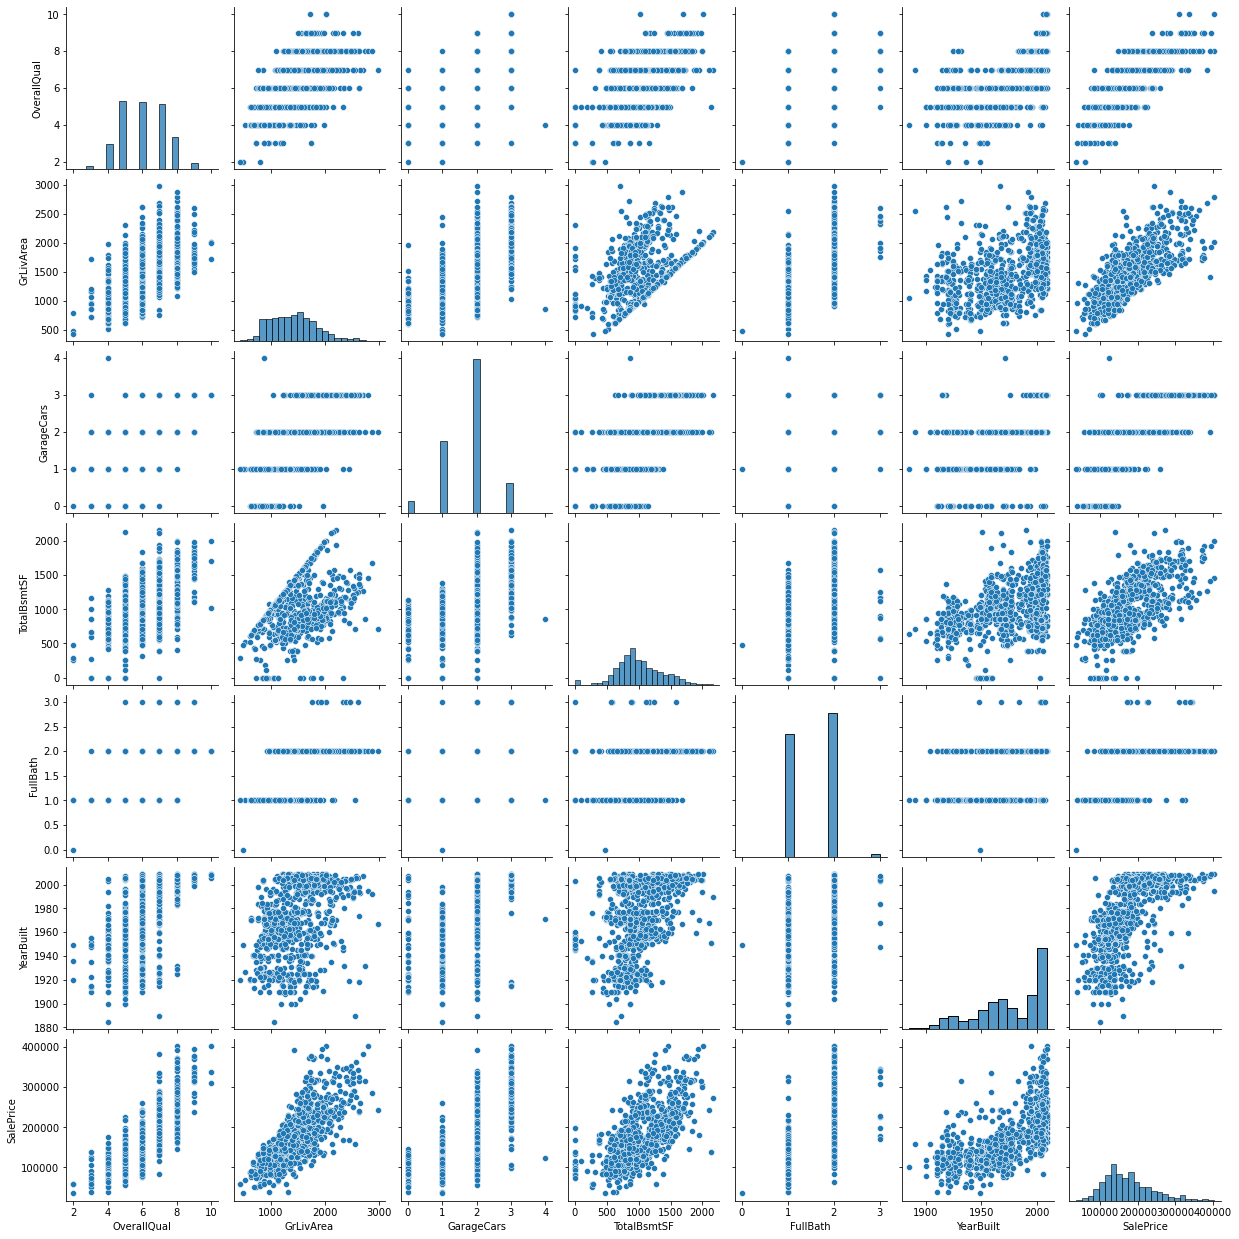

In [30]:
#scatterplot
columns = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt', 'SalePrice']
sns.pairplot(df[columns])
plt.show()

###### Observation
    The Pairplot shows saleprice has linear relationship with yearbuilt, overallquality, TotalBsmtSF, Garden living area, yearbuilt

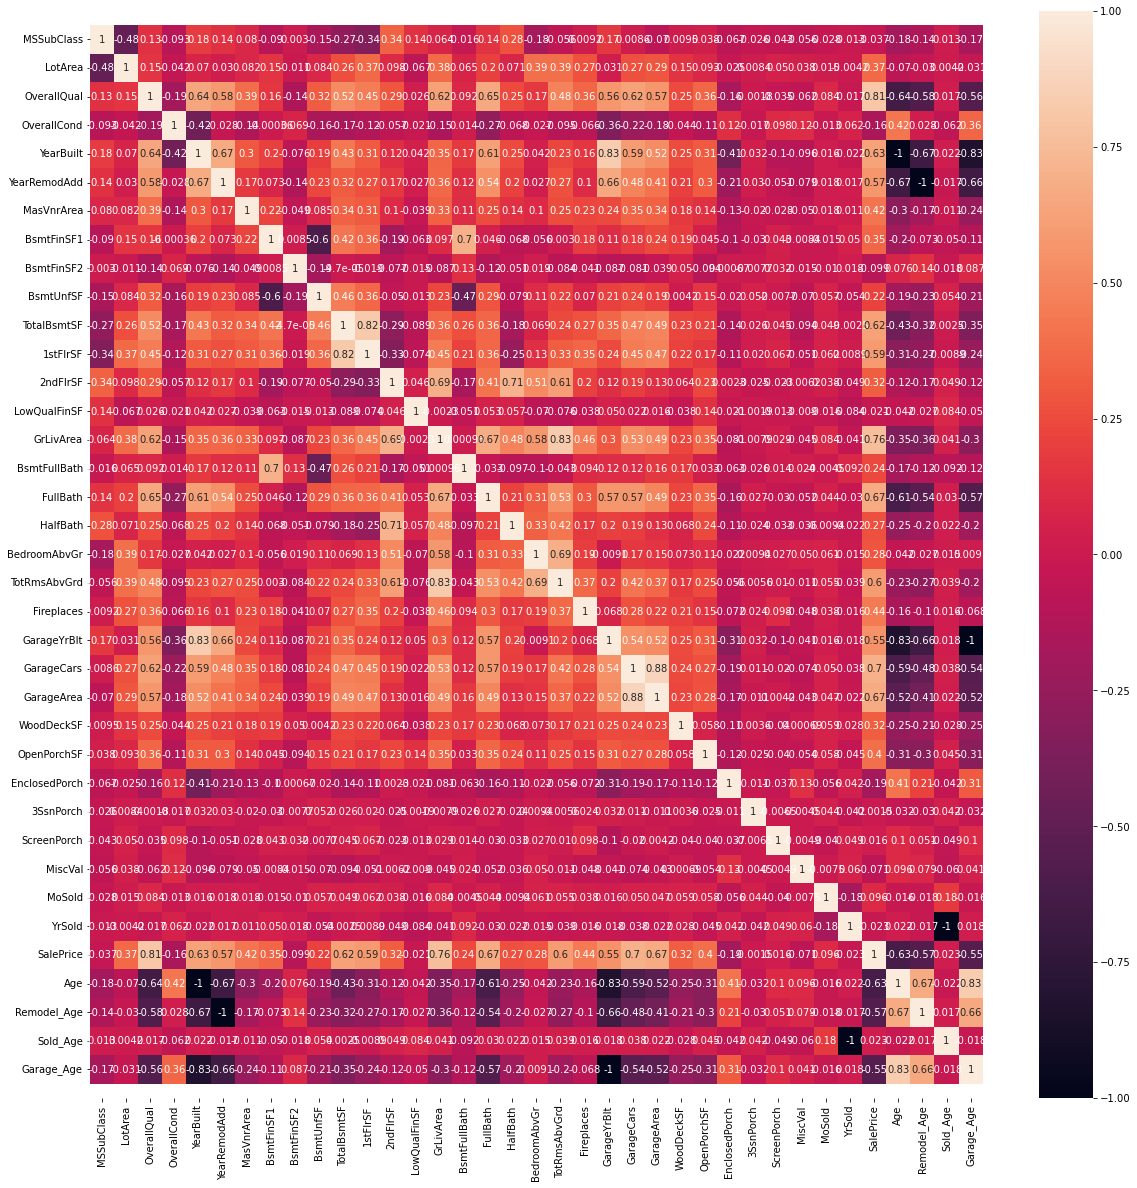

In [31]:
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(df.corr(), 
            xticklabels=df.corr().columns.values,
            yticklabels=df.corr().columns.values,annot= True)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.show()

###### Observations:
    The Heatmap shows there are some high correlations

### Prepare data for model

#### Create dummies for the categorical variables

In [32]:
# Creating dummies for categorical variables
dummies = pd.get_dummies(df[categorical_cols],drop_first=True)

In [33]:
# Drop Categorical columns
df.drop(categorical_cols,axis=1,inplace=True)

In [34]:
# Concatenate original dataframe and dummies
df = pd.concat([df,dummies],axis=1)

#### Splitting into train and test

In [35]:
# Split data into train set & test set
df_train, df_test = train_test_split(df, train_size =0.7, random_state=42)
print(df_train.shape)
print(df_test.shape)

(716, 200)
(308, 200)


#### Dividing independent and dependent variables

In [36]:
#Separate the independent and dependent variables
y_train = df_train.SalePrice
X_train = df_train.drop("SalePrice",1)

y_test= df_test.SalePrice
X_test = df_test.drop("SalePrice",1)

#### Target variable transformation

In [37]:
#Transforming the Target feature to make the data gaussian
pt = PowerTransformer(method='box-cox', standardize=False)
y_train = pt.fit_transform(y_train.to_frame())
y_test = pt.transform(y_test.to_frame())

#### Scaling the training data

In [38]:
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

### Linear Regression with RFE

In [39]:
# Running RFE with the output number of the variable equal to 20
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 50)# running RFE
rfe = rfe.fit(X_train, y_train)

In [40]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 24),
 ('LotArea', False, 94),
 ('OverallQual', False, 11),
 ('OverallCond', False, 27),
 ('YearBuilt', False, 3),
 ('YearRemodAdd', True, 1),
 ('MasVnrArea', False, 148),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 96),
 ('FullBath', False, 110),
 ('HalfBath', False, 112),
 ('BedroomAbvGr', False, 146),
 ('TotRmsAbvGrd', False, 131),
 ('Fireplaces', False, 78),
 ('GarageYrBlt', True, 1),
 ('GarageCars', False, 20),
 ('GarageArea', False, 79),
 ('WoodDeckSF', False, 104),
 ('OpenPorchSF', False, 102),
 ('EnclosedPorch', False, 125),
 ('3SsnPorch', False, 139),
 ('ScreenPorch', False, 117),
 ('MiscVal', False, 133),
 ('MoSold', False, 121),
 ('YrSold', True, 1),
 ('Age', False, 6),
 ('Remodel_Age', True, 1),
 ('Sold_Age', True, 1),
 ('Garage_Age', True, 1),
 ('MSZoning_FV', True, 1)

In [41]:
# Features which are selected by RFE
col = X_train.columns[rfe.support_]
col

Index(['YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageYrBlt',
       'YrSold', 'Remodel_Age', 'Sold_Age', 'Garage_Age', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_BrDale',
       'Neighborhood_Crawfor', 'Neighborhood_MeadowV', 'Condition1_RRNe',
       'Condition1_RRNn', 'BldgType_2fmCon', 'HouseStyle_2.5Unf',
       'RoofStyle_Gambrel', 'Exterior1st_CBlock', 'Exterior2nd_CBlock',
       'ExterQual_Fa', 'ExterQual_Gd', 'ExterQual_TA', 'ExterCond_Gd',
       'ExterCond_TA', 'Foundation_Wood', 'BsmtCond_Gd', 'BsmtCond_TA',
       'BsmtExposure_Gd', 'Functional_Min1', 'Functional_Min2',
       'Functional_Typ', 'GarageType_CarPort', 'GarageQual_Fa',
       'GarageQual_Gd', 'GarageQual_TA', 'GarageCond_Fa', 'GarageCond_Gd',
       'GarageCond_Po', 'GarageCond_TA', 'SaleType_Con', 'SaleType_ConLw'],
      dtype='object')

#### Building model using statsmodel, for the detailed statistics

In [42]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [43]:
# Adding a constant variable  
X_train_rfe = sm.add_constant(X_train_rfe)

In [44]:
# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()

In [45]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     147.9
Date:                Wed, 08 Jun 2022   Prob (F-statistic):          8.71e-307
Time:                        12:45:44   Log-Likelihood:                -161.63
No. Observations:                 716   AIC:                             407.3
Df Residuals:                     674   BIC:                             599.4
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   18.2987 

In [46]:
# Creating a dataframe which will contain names of all the features and its corresponding VIF values
# Calculating VIF for the above model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
high_vif = vif[vif['VIF']>10]
high_vif

,Features,VIF
48,GarageCond_TA,inf
12,Remodel_Age,inf
46,GarageCond_Gd,inf
47,GarageCond_Po,inf
1,YearRemodAdd,inf
27,Exterior1st_CBlock,inf
28,Exterior2nd_CBlock,inf
43,GarageQual_Gd,inf
42,GarageQual_Fa,inf
14,Garage_Age,inf


In [47]:
#Drop High VIF Features
X_train_fd=X_train_rfe.drop(['MSZoning_RL', 'MSZoning_RM','MSZoning_FV','ExterQual_TA','ExterQual_Gd','ExterCond_TA','ExterCond_Gd'],axis=1)

#create third model
X_train_fd = sm.add_constant(X_train_fd)

lm_fd=sm.OLS(y_train,X_train_fd).fit()

#Print the summary 
lm_fd.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     135.9
Date:                Wed, 08 Jun 2022   Prob (F-statistic):          8.31e-278
Time:                        12:45:44   Log-Likelihood:                -251.17
No. Observations:                 716   AIC:                             572.3
Df Residuals:                     681   BIC:                             732.4
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   19.5765      0.379     51.648      0.000      18.832      20.321
YearRemodAdd             0.0739      0.009      7.794      0.000       0.055       0.093
BsmtFinSF1               0.1318      0.011     11.878      0.000       0.110       0.154
BsmtFinSF2               0.0044      0.014      0.322      0.748      -0.022       0.031
BsmtUnfSF                0.0185      0.011      1.690      0.091      -0.003       0.040
TotalBsmtSF              0.1698      0.018      9.693      0.000       0.135       0.204
1stFlrSF                 0.1664      0.019      8.952      0.000       0.130       0.203
2ndFlrSF                 0.2008      0.011     18.310      0.000       0.179       0.222
LowQualFinSF             0.0025      0.013      0.185      0.853      -0.024       0.029
GrLivArea                0.3070      0.010     29.862      0.000       0.287       0.327
GarageYrBlt              0.0870      0.010      8.312      0.000       0.066       0.108
YrSold                   0.0041      0.007      0.605      0.545      -0.009       0.018
Remodel_Age             -0.0739      0.009     -7.794      0.000      -0.093      -0.055
Sold_Age                -0.0041      0.007     -0.605      0.545      -0.018       0.009
Garage_Age              -0.0870      0.010     -8.312      0.000      -0.108      -0.066
MSZoning_RH             -0.0546      0.132     -0.413      0.680      -0.314       0.205
Neighborhood_BrDale     -0.5086      0.147     -3.463      0.001      -0.797      -0.220
Neighborhood_Crawfor     0.7853      0.093      8.446      0.000       0.603       0.968
Neighborhood_MeadowV    -0.5282      0.111     -4.749      0.000      -0.747      -0.310
Condition1_RRNe      -1.695e-15   2.51e-16     -6.749      0.000   -2.19e-15    -1.2e-15
Condition1_RRNn          0.4704      0.260      1.807      0.071      -0.041       0.981
BldgType_2fmCon       1.003e-16   7.89e-17      1.271      0.204   -5.46e-17    2.55e-16
HouseStyle_2.5Unf       -0.4392      0.364     -1.208      0.228      -1.153       0.275
RoofStyle_Gambrel       -0.8646      0.168     -5.132      0.000      -1.195      -0.534
Exterior1st_CBlock      -0.0466      0.206     -0.227      0.821      -0.450       0.357
Exterior2nd_CBlock      -0.0466      0.206     -0.227      0.821      -0.450       0.357
ExterQual_Fa            -0.5396      0.210     -2.564      0.011      -0.953      -0.126
Foundation_Wood         -0.4697      0.252     -1.864      0.063      -0.964       0.025
BsmtCond_Gd              0.4059      0.121      3.364      0.001       0.169       0.643
BsmtCond_TA              0.3099      0.099      3.122      0.002       0.115       0.505
BsmtExposure_Gd          0.2028      0.060      3.369      0.001       0.085       0.321
Functional_Min1          0.4086      0.135      3.035    

In [48]:
# Calculating VIF for the above model
vif = pd.DataFrame()
vif['Features'] = X_train_fd.columns
vif['VIF'] = [variance_inflation_factor(X_train_fd.values, i) for i in range(X_train_fd.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
40,GarageCond_Po,inf
12,Remodel_Age,inf
1,YearRemodAdd,inf
37,GarageQual_TA,inf
38,GarageCond_Fa,inf
39,GarageCond_Gd,inf
36,GarageQual_Gd,inf
35,GarageQual_Fa,inf
41,GarageCond_TA,inf
14,Garage_Age,inf


In [49]:
# Dropping 
#X_train_sd = X_train_fd.drop(['Exterior1st_CBlock', 'Exterior2nd_CBlock', 'GarageType_CarPort', 'GarageQual_Fa', 'GarageQual_Gd', 'GarageQual_TA', 'GarageCond_Gd', 'GarageCond_Po', 'GarageYrBlt', 'YrSold', '3SsnPorch', 'Sold_Age'], axis = 1)
#X_train_sd = X_train_fd.drop(['BsmtFinSF2', 'LowQualFinSF', 'YrSold', 'Sold_Age', 'MSZoning_RH', 'Exterior1st_CBlock', 'Exterior2nd_CBlock', 'GarageType_CarPort', 'GarageQual_Gd', 'GarageQual_TA', 'GarageCond_Gd'], axis = 1)
X_train_sd = X_train_fd.drop(['BsmtFinSF2', 'LowQualFinSF', 'YrSold', 'Sold_Age', 'MSZoning_RH', 'Exterior1st_CBlock', 'Exterior2nd_CBlock', 'GarageType_CarPort', 'GarageQual_Gd', 'GarageQual_TA', 'GarageCond_Gd', 'BsmtUnfSF', 'BldgType_2fmCon', 'HouseStyle_2.5Unf', 'Foundation_Wood', 'GarageQual_Fa', 'GarageCond_Po', 'GarageCond_TA', 'SaleType_Con', 'SaleType_ConLw'], axis = 1)
#create third model
X_train_sd = sm.add_constant(X_train_sd)

lm_sd=sm.OLS(y_train,X_train_sd).fit()

#Print the summary 
lm_sd.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     227.8
Date:                Wed, 08 Jun 2022   Prob (F-statistic):          4.28e-289
Time:                        12:45:45   Log-Likelihood:                -261.97
No. Observations:                 716   AIC:                             565.9
Df Residuals:                     695   BIC:                             662.0
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   19.2204      0.131    146.163      0.000      18.962      19.479
YearRemodAdd             0.0721      0.009      7.739      0.000       0.054       0.090
BsmtFinSF1               0.1135      0.015      7.408      0.000       0.083       0.144
TotalBsmtSF              0.1853      0.025      7.457      0.000       0.137       0.234
1stFlrSF                 0.0812      0.796      0.102      0.919      -1.482       1.644
2ndFlrSF                 0.0921      1.014      0.091      0.928      -1.900       2.084
GrLivArea                0.4226      1.095      0.386      0.700      -1.727       2.572
GarageYrBlt              0.0917      0.010      9.116      0.000       0.072       0.111
Remodel_Age             -0.0721      0.009     -7.739      0.000      -0.090      -0.054
Garage_Age              -0.0917      0.010     -9.116      0.000      -0.111      -0.072
Neighborhood_BrDale     -0.5092      0.147     -3.454      0.001      -0.799      -0.220
Neighborhood_Crawfor     0.7423      0.090      8.204      0.000       0.565       0.920
Neighborhood_MeadowV    -0.5248      0.110     -4.778      0.000      -0.740      -0.309
Condition1_RRNe      -2.723e-16   2.71e-16     -1.005      0.315   -8.04e-16    2.59e-16
Condition1_RRNn          0.5181      0.260      1.995      0.046       0.008       1.028
RoofStyle_Gambrel       -0.8086      0.164     -4.927      0.000      -1.131      -0.486
ExterQual_Fa            -0.5037      0.166     -3.031      0.003      -0.830      -0.177
BsmtCond_Gd              0.3876      0.118      3.276      0.001       0.155       0.620
BsmtCond_TA              0.2814      0.097      2.892      0.004       0.090       0.472
BsmtExposure_Gd          0.2102      0.060      3.489      0.001       0.092       0.328
Functional_Min1          0.3908      0.134      2.922      0.004       0.128       0.653
Functional_Min2          0.4017      0.134      3.009      0.003       0.140       0.664
Functional_Typ           0.7197      0.102      7.090      0.000       0.520       0.919
GarageCond_Fa           -0.2858      0.089     -3.200      0.001      -0.461      -0.110
==============================================================================
Omnibus:                      130.756   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              354.480
Skew:                          -0.920   Prob(JB):                     1.06e-77
Kurtosis:                       5.915   Cond. No.                     1.58e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.16e-33. This might indicate that there are
strong multicollinearity probl

In [50]:
# Calculating VIF for the above model
vif = pd.DataFrame()
vif['Features'] = X_train_sd.columns
vif['VIF'] = [variance_inflation_factor(X_train_sd.values, i) for i in range(X_train_sd.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
7,GarageYrBlt,inf
8,Remodel_Age,inf
9,Garage_Age,inf
1,YearRemodAdd,inf
6,GrLivArea,6842.95
5,2ndFlrSF,5876.84
4,1stFlrSF,3619.01
0,const,98.74
22,Functional_Typ,3.54
3,TotalBsmtSF,3.53


In [51]:
# Dropping high vif and high p-val
X_train_td = X_train_sd.drop(['1stFlrSF', 'Condition1_RRNe','GarageYrBlt','Remodel_Age'], axis = 1)
#create third model
X_train_td = sm.add_constant(X_train_td)

lm_td=sm.OLS(y_train,X_train_td).fit()

#Print the summary 
lm_td.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     240.1
Date:                Wed, 08 Jun 2022   Prob (F-statistic):          2.74e-290
Time:                        12:45:45   Log-Likelihood:                -261.97
No. Observations:                 716   AIC:                             563.9
Df Residuals:                     696   BIC:                             655.4
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   19.2205      0.131    146.279      0.000      18.963      19.479
YearRemodAdd             0.1441      0.019      7.744      0.000       0.108       0.181
BsmtFinSF1               0.1135      0.015      7.420      0.000       0.083       0.144
TotalBsmtSF              0.1856      0.025      7.512      0.000       0.137       0.234
2ndFlrSF                -0.0113      0.032     -0.356      0.722      -0.074       0.051
GrLivArea                0.5342      0.033     16.176      0.000       0.469       0.599
Garage_Age              -0.1832      0.020     -9.142      0.000      -0.223      -0.144
Neighborhood_BrDale     -0.5089      0.147     -3.455      0.001      -0.798      -0.220
Neighborhood_Crawfor     0.7422      0.090      8.209      0.000       0.565       0.920
Neighborhood_MeadowV    -0.5245      0.110     -4.780      0.000      -0.740      -0.309
Condition1_RRNn          0.5180      0.259      1.997      0.046       0.009       1.027
RoofStyle_Gambrel       -0.8086      0.164     -4.930      0.000      -1.131      -0.487
ExterQual_Fa            -0.5034      0.166     -3.032      0.003      -0.829      -0.177
BsmtCond_Gd              0.3878      0.118      3.280      0.001       0.156       0.620
BsmtCond_TA              0.2814      0.097      2.894      0.004       0.091       0.472
BsmtExposure_Gd          0.2102      0.060      3.491      0.001       0.092       0.328
Functional_Min1          0.3907      0.134      2.924      0.004       0.128       0.653
Functional_Min2          0.4016      0.133      3.011      0.003       0.140       0.664
Functional_Typ           0.7194      0.101      7.094      0.000       0.520       0.919
GarageCond_Fa           -0.2858      0.089     -3.202      0.001      -0.461      -0.111
==============================================================================
Omnibus:                      130.634   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              354.140
Skew:                          -0.919   Prob(JB):                     1.26e-77
Kurtosis:                       5.914   Cond. No.                         33.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
# Calculating VIF for the above model
vif = pd.DataFrame()
vif['Features'] = X_train_td.columns
vif['VIF'] = [variance_inflation_factor(X_train_td.values, i) for i in range(X_train_td.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,98.73
5,GrLivArea,6.24
4,2ndFlrSF,5.78
18,Functional_Typ,3.54
3,TotalBsmtSF,3.49
14,BsmtCond_TA,3.18
13,BsmtCond_Gd,3.11
16,Functional_Min1,2.37
6,Garage_Age,2.30
17,Functional_Min2,2.22


In [53]:
# Dropping high VIF and high P-value
X_train_4d = X_train_td.drop(['GrLivArea'], axis = 1)
#create third model
X_train_4d = sm.add_constant(X_train_4d)

lm_4d=sm.OLS(y_train,X_train_4d).fit()

#Print the summary 
lm_4d.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     173.9
Date:                Wed, 08 Jun 2022   Prob (F-statistic):          2.13e-243
Time:                        12:45:45   Log-Likelihood:                -376.23
No. Observations:                 716   AIC:                             790.5
Df Residuals:                     697   BIC:                             877.4
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   19.3002      0.154    125.398      0.000      18.998      19.602
YearRemodAdd             0.1709      0.022      7.866      0.000       0.128       0.214
BsmtFinSF1               0.1104      0.018      6.153      0.000       0.075       0.146
TotalBsmtSF              0.4763      0.020     23.972      0.000       0.437       0.515
2ndFlrSF                 0.4415      0.018     25.023      0.000       0.407       0.476
Garage_Age              -0.1651      0.023     -7.040      0.000      -0.211      -0.119
Neighborhood_BrDale     -0.7335      0.172     -4.267      0.000      -1.071      -0.396
Neighborhood_Crawfor     0.8439      0.106      7.982      0.000       0.636       1.051
Neighborhood_MeadowV    -0.6948      0.128     -5.427      0.000      -0.946      -0.443
Condition1_RRNn          0.5890      0.304      1.937      0.053      -0.008       1.186
RoofStyle_Gambrel       -0.8473      0.192     -4.407      0.000      -1.225      -0.470
ExterQual_Fa            -0.4097      0.195     -2.106      0.036      -0.792      -0.028
BsmtCond_Gd              0.5462      0.138      3.954      0.000       0.275       0.817
BsmtCond_TA              0.3601      0.114      3.164      0.002       0.137       0.584
BsmtExposure_Gd          0.3111      0.070      4.434      0.000       0.173       0.449
Functional_Min1          0.6025      0.156      3.865      0.000       0.296       0.909
Functional_Min2          0.5372      0.156      3.442      0.001       0.231       0.844
Functional_Typ           0.5364      0.118      4.541      0.000       0.305       0.768
GarageCond_Fa           -0.3302      0.105     -3.158      0.002      -0.536      -0.125
==============================================================================
Omnibus:                       47.142   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              191.329
Skew:                          -0.030   Prob(JB):                     2.84e-42
Kurtosis:                       5.532   Cond. No.                         33.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
# Calculating VIF for the above model
vif = pd.DataFrame()
vif['Features'] = X_train_4d.columns
vif['VIF'] = [variance_inflation_factor(X_train_4d.values, i) for i in range(X_train_4d.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,98.59
17,Functional_Typ,3.49
13,BsmtCond_TA,3.18
12,BsmtCond_Gd,3.09
15,Functional_Min1,2.34
5,Garage_Age,2.29
16,Functional_Min2,2.21
1,YearRemodAdd,1.96
3,TotalBsmtSF,1.64
2,BsmtFinSF1,1.34


#### Observation
1. From above model statistics we can observe that the P-value for most of the variables is around zero and less that 0.05(significant level).
2. Also, VIF is also low and in same praportion for all variables.

### Ridge regression

In [55]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 200]}

ridge = Ridge()

# Using RFE to find top 70 variables
rfe = RFE(estimator=Ridge(), n_features_to_select=70)
rfe = rfe.fit(X_train,y_train)
columns = X_train.columns[rfe.support_]
X_train_rfe = X_train[columns]
X_test_rfe = X_test[columns]

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, param_grid = params, scoring= 'r2', cv = folds, verbose = 1, return_train_score=True)            
model_cv.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 200]},
             return_train_score=True, scoring='r2', verbose=1)

In [56]:
cv_results = pd.DataFrame(model_cv.cv_results_)

In [57]:
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002007,1.436744e-05,0.001194,4.031792e-04,0.0001,{'alpha': 0.0001},0.902839,0.935490,0.941289,0.922409,...,0.926613,0.013391,14,0.952516,0.943844,0.943756,0.946586,0.944489,0.946238,0.003301
1,0.002405,4.818606e-04,0.001004,3.756436e-06,0.001,{'alpha': 0.001},0.902847,0.935505,0.941293,0.922426,...,0.926620,0.013390,13,0.952516,0.943844,0.943756,0.946586,0.944489,0.946238,0.003301
2,0.002399,4.752212e-04,0.001393,4.817391e-04,0.01,{'alpha': 0.01},0.902899,0.935651,0.941338,0.922574,...,0.926675,0.013384,12,0.952511,0.943842,0.943754,0.946581,0.944488,0.946235,0.003300
3,0.002202,3.989510e-04,0.001398,4.915372e-04,0.05,{'alpha': 0.05},0.903005,0.936192,0.941538,0.923016,...,0.926851,0.013414,11,0.952469,0.943804,0.943716,0.946518,0.944462,0.946194,0.003297
4,0.001999,5.761645e-07,0.001001,8.714517e-07,0.1,{'alpha': 0.1},0.903082,0.936648,0.941757,0.923341,...,0.926990,0.013462,8,0.952390,0.943717,0.943628,0.946398,0.944404,0.946107,0.003296


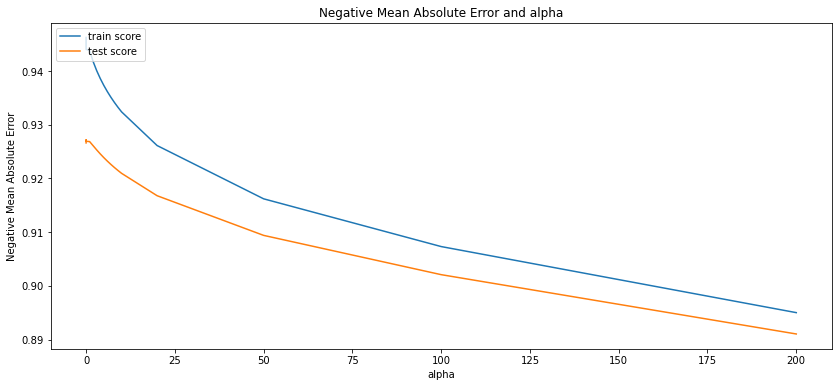

In [58]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.figure(figsize=(14,6))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [59]:
alpha = cv_results['param_alpha'].loc[cv_results['mean_test_score'].idxmax()]
ridge_res = Ridge(alpha=alpha)
ridge_res.fit(X_train_rfe,y_train)
ridge_coef = ridge_res.coef_
y_train_pred = ridge_res.predict(X_train_rfe)
y_test_pred = ridge_res.predict(X_test_rfe)
print('The optimum alpha is',alpha)
print("Train r2 score",r2_score(y_train, y_train_pred))
print("Test r2 score",r2_score(y_test, y_test_pred))
print("MSE for best alpha",mean_squared_error(y_test, y_test_pred))

The optimum alpha is 0
Train r2 score 0.9448846983066383
Test r2 score 0.9024337659739777
MSE for best alpha 0.09423509082477873


In [60]:
# Chekcing the VIF
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
high_vif = vif[vif['VIF']>10]
high_vif

,Features,VIF
7,GrLivArea,7516.03
6,2ndFlrSF,6453.84
5,1stFlrSF,3971.87
12,MSZoning_RL,226.67
42,ExterCond_TA,144.70
60,Functional_Typ,113.89
40,ExterQual_TA,64.10
49,BsmtCond_TA,56.95
13,MSZoning_RM,35.61
52,CentralAir_Y,35.43


In [61]:
# Dropping cols with high VIF
X_train_rfe1 = X_train_rfe.drop(high_vif.Features,axis=1)
X_test_rfe1 = X_test_rfe.drop(high_vif.Features,axis=1)

In [62]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 200]}
ridge = Ridge()

# cross validation
folds = 10
model_cv = GridSearchCV(estimator = ridge, param_grid = params, scoring= 'r2', cv = folds, verbose = 1, return_train_score=True)            
model_cv.fit(X_train_rfe1, y_train) 

Fitting 10 folds for each of 27 candidates, totalling 270 fits


GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 200]},
             return_train_score=True, scoring='r2', verbose=1)

In [63]:
cv_results = pd.DataFrame(model_cv.cv_results_)

In [64]:
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.002499,0.000500,0.001200,0.000399,0.0001,{'alpha': 0.0001},0.739875,0.731297,0.861202,0.795385,...,0.843821,0.848654,0.841528,0.850426,0.838381,0.847410,0.849865,0.846729,0.847954,0.005510
1,0.002400,0.000663,0.001299,0.000458,0.001,{'alpha': 0.001},0.739874,0.731314,0.861210,0.795487,...,0.843821,0.848654,0.841528,0.850426,0.838381,0.847410,0.849865,0.846729,0.847954,0.005510
2,0.002100,0.000299,0.001704,0.000460,0.01,{'alpha': 0.01},0.739870,0.731479,0.861292,0.796485,...,0.843820,0.848653,0.841527,0.850425,0.838381,0.847410,0.849864,0.846728,0.847953,0.005510
3,0.002493,0.000671,0.001700,0.000458,0.05,{'alpha': 0.05},0.739853,0.732170,0.861647,0.800429,...,0.843803,0.848618,0.841508,0.850408,0.838369,0.847402,0.849845,0.846709,0.847935,0.005510
4,0.002193,0.000407,0.001706,0.000463,0.1,{'alpha': 0.1},0.739841,0.732943,0.862065,0.804453,...,0.843756,0.848528,0.841455,0.850363,0.838335,0.847380,0.849793,0.846656,0.847886,0.005508


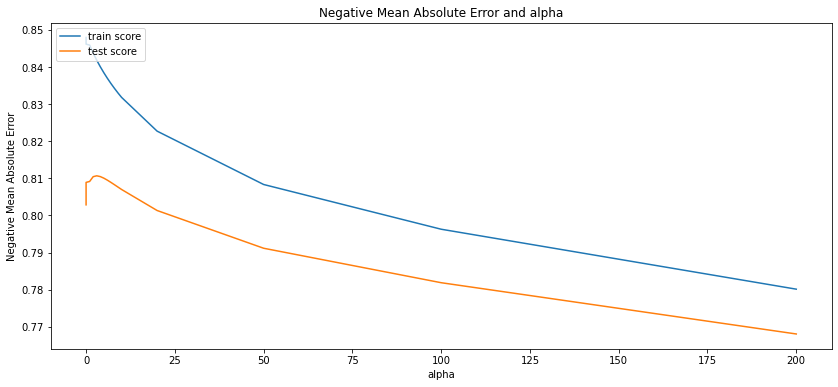

In [65]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.figure(figsize=(14,6))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [66]:
alpha = cv_results['param_alpha'].loc[cv_results['mean_test_score'].idxmax()]
ridge_res1 = Ridge(alpha=alpha)
ridge_res1.fit(X_train_rfe1,y_train)
ridge_coef1 = ridge_res1.coef_
y_train_pred = ridge_res1.predict(X_train_rfe1)
y_test_pred = ridge_res1.predict(X_test_rfe1)
print('The optimum alpha is',alpha)
print("Train r2 score",r2_score(y_train, y_train_pred))
print("Test r2 score",r2_score(y_test, y_test_pred))
print("MSE for best alpha",mean_squared_error(y_test, y_test_pred))

The optimum alpha is 3
Train r2 score 0.8410907349258697
Test r2 score 0.8407312131934022
MSE for best alpha 0.1538309717506267


In [67]:
# Chekcing the VIF
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
high_vif = vif[vif['VIF']>10]
high_vif

,Features,VIF


In [68]:
#Displaing the co-efficients of the model
ridge_coef1 = pd.DataFrame(np.atleast_2d(ridge_coef1),columns=X_train_rfe1.columns)
ridge_coef1 = ridge_coef1.T
ridge_coef1.rename(columns={0: 'Ridge Coefficient'},inplace=True)
ridge_coef1.sort_values(by=['Ridge Coefficient'], ascending=False,inplace=True)
ridge_coef1

,Ridge Coefficient
Neighborhood_Crawfor,0.677208
OverallQual,0.373262
Foundation_Slab,0.367079
Neighborhood_ClearCr,0.265230
Condition1_PosN,0.263547
Neighborhood_StoneBr,0.259757
Exterior1st_WdShing,0.227270
Foundation_PConc,0.219011
GarageArea,0.211640
Functional_Min2,0.210317


### Lasso Regression

In [69]:
# find the optimum alpha
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 200]}
lasso = Lasso(random_state=42)

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, param_grid = params, scoring= 'r2', cv = folds, verbose = 1, return_train_score=True)            
model_cv.fit(X_train_rfe1, y_train) 

cv_results = pd.DataFrame(model_cv.cv_results_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


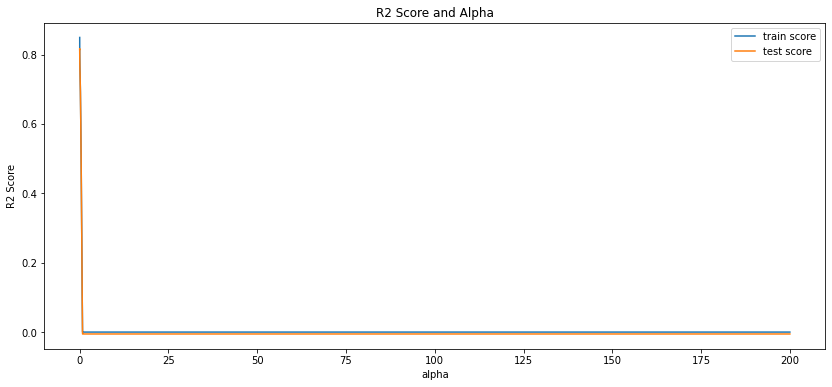

In [70]:
# plotting
plt.figure(figsize=(14,6))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.title("R2 Score and Alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [71]:
alpha = cv_results['param_alpha'].loc[cv_results['mean_test_score'].idxmax()]
lasso_final = Lasso(alpha=alpha,random_state=100)
lasso_final.fit(X_train_rfe1,y_train)
lasso_coef = lasso_final.coef_
y_train_pred = lasso_final.predict(X_train_rfe1)
y_test_pred = lasso_final.predict(X_test_rfe1)
print('The optimum alpha is',alpha)
print("Train r2 score",r2_score(y_train, y_train_pred))
print("Test r2 score",r2_score(y_test, y_test_pred))
print("MSE for best alpha",mean_squared_error(y_test, y_test_pred))

The optimum alpha is 0.001
Train r2 score 0.8420851869340423
Test r2 score 0.8400970572755735
MSE for best alpha 0.15444347607766387


In [72]:
# Chekcing the VIF
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
high_vif = vif[vif['VIF']>10]
high_vif

,Features,VIF


In [73]:
#Displaing the co-efficients of the model
lasso_coeff = pd.DataFrame(np.atleast_2d(lasso_coef),columns=X_train_rfe1.columns)
lasso_coeff = lasso_coeff.T
lasso_coeff.rename(columns={0: "Lasso Coefficient"},inplace=True)
lasso_coeff.sort_values(by=['Lasso Coefficient'], ascending=False,inplace=True)
lasso_coeff

,Lasso Coefficient
Neighborhood_Crawfor,0.764159
Foundation_Slab,0.419823
OverallQual,0.372493
Neighborhood_ClearCr,0.280890
Condition1_PosN,0.279832
Neighborhood_StoneBr,0.278532
Exterior1st_WdShing,0.216466
GarageArea,0.212833
Foundation_PConc,0.212324
Functional_Min2,0.199030


#### Observations:
<br>The best alpha value for Ridge is 3
<br>The best alpha value for Lasso is 0.001
<br>Lasso Regression gave us a simpler model with most of the coefficients as zero values.

### Subjective questions analysis

In [74]:
# Doubling alphas for ridge and lasso
double_ridge_alpha=3*2
double_lasso_alpha=0.001*2

#### Ridge model with double alpha

In [75]:
# Build double alpha ridge model
ridge_double = Ridge(alpha=double_ridge_alpha)
ridge_double.fit(X_train_rfe1,y_train)
ridge_double_coef = ridge_double.coef_
y_train_pred = ridge_double.predict(X_train_rfe1)
y_test_pred = ridge_double.predict(X_test_rfe1)
print("Train r2 score",r2_score(y_train, y_train_pred))
print("Test r2 score",r2_score(y_test, y_test_pred))
print("MSE for best alpha",mean_squared_error(y_test, y_test_pred))

Train r2 score 0.8366662814251147
Test r2 score 0.8444462554767165
MSE for best alpha 0.15024276984367763


In [76]:
ridge_double_coeff = pd.DataFrame(np.atleast_2d(ridge_double_coef),columns=X_train_rfe1.columns)
ridge_double_coeff = ridge_double_coeff.T
ridge_double_coeff.rename(columns={0: 'Ridge Doubled Alpha Coefficient'},inplace=True)
ridge_double_coeff.sort_values(by=['Ridge Doubled Alpha Coefficient'], ascending=False,inplace=True)
print('Important predictor variables are as follows:')
ridge_double_coeff

Important predictor variables are as follows:


,Ridge Doubled Alpha Coefficient
Neighborhood_Crawfor,0.581877
OverallQual,0.382382
Foundation_Slab,0.276825
GarageArea,0.214223
Neighborhood_ClearCr,0.212332
Foundation_PConc,0.207092
Condition1_PosN,0.201313
Neighborhood_StoneBr,0.199539
Functional_Min2,0.188876
LotConfig_CulDSac,0.171273


#### Lasso model with double alpha

In [77]:
# Build double alpha lasso model
lasso_double = Lasso(alpha=double_lasso_alpha)
lasso_double.fit(X_train_rfe1,y_train)
lasso_double_coef = ridge_double.coef_
y_train_pred = lasso_double.predict(X_train_rfe1)
y_test_pred = lasso_double.predict(X_test_rfe1)
print("Train r2 score",r2_score(y_train, y_train_pred))
print("Test r2 score",r2_score(y_test, y_test_pred))
print("MSE for best alpha",mean_squared_error(y_test, y_test_pred))

Train r2 score 0.8325366350533135
Test r2 score 0.8446198765885877
MSE for best alpha 0.15007507656936392


In [78]:
lasso_double_coeff = pd.DataFrame(np.atleast_2d(lasso_double_coef),columns=X_train_rfe1.columns)
lasso_double_coeff = lasso_double_coeff.T
lasso_double_coeff.rename(columns={0: 'Lasso Doubled Alpha Coefficient'},inplace=True)
lasso_double_coeff.sort_values(by=['Lasso Doubled Alpha Coefficient'], ascending=False,inplace=True)
print('Important predictor variables are as follows:')
lasso_double_coeff

Important predictor variables are as follows:


,Lasso Doubled Alpha Coefficient
Neighborhood_Crawfor,0.581877
OverallQual,0.382382
Foundation_Slab,0.276825
GarageArea,0.214223
Neighborhood_ClearCr,0.212332
Foundation_PConc,0.207092
Condition1_PosN,0.201313
Neighborhood_StoneBr,0.199539
Functional_Min2,0.188876
LotConfig_CulDSac,0.171273


#### Remove top five features and rebuild the Lasso regression

In [82]:
#Removing top 5 important predictor variables from the dataset
X_test_rfe2 = X_test_rfe1.drop(['Neighborhood_Crawfor', 'Foundation_Slab', 'OverallQual', 'Neighborhood_ClearCr', 'Condition1_PosN'],axis=1)
X_train_rfe2 = X_train_rfe1.drop(['Neighborhood_Crawfor', 'Foundation_Slab', 'OverallQual', 'Neighborhood_ClearCr', 'Condition1_PosN'],axis=1)

# Building Lasso Model with the new dataset
lasso_final = Lasso(alpha=0.00009)
lasso_final.fit(X_train_rfe2,y_train)
lasso_fin_coef = lasso_final.coef_
y_train_pred = lasso_final.predict(X_train_rfe2)
y_test_pred = lasso_final.predict(X_test_rfe2)
print("Train r2 score",r2_score(y_train, y_train_pred))
print("Test r2 score",r2_score(y_test, y_test_pred))
print("MSE for best alpha",mean_squared_error(y_test, y_test_pred))

Train r2 score 0.768389870496627
Test r2 score 0.7504526746130382
MSE for best alpha 0.24102718637934598


In [83]:
lasso_fin_coef1 = pd.DataFrame(np.atleast_2d(lasso_fin_coef),columns=X_train_rfe2.columns)
lasso_fin_coef1 = lasso_fin_coef1.T
lasso_fin_coef1.rename(columns={0: 'Lasso Coefficient'},inplace=True)
lasso_fin_coef1.sort_values(by=['Lasso Coefficient'], ascending=False,inplace=True)
print('The top 5 features after rebuilding Lasso model are as follows:')
lasso_fin_coef1.head(5)

The top 5 features after rebuilding Lasso model are as follows:


,Lasso Coefficient
SaleType_CWD,1.421923
Neighborhood_StoneBr,0.604184
Exterior1st_WdShing,0.439305
Neighborhood_NridgHt,0.407928
Foundation_PConc,0.353640
